# ECO-7026A Assessment 1 template - 2023/24

## Important information!

This is the template Jupyter notebook for completing Assessment 1.

Each question (and the associated marks) are included as text cells.  After each one there is provided a code cell, where you can fill in your solution.

If you wish, you **may** add additional code cells in between each question.  However, you **may not** delete any of the text cells containing the questions.

Each question will be marked based on the content of the code cells which follow a question cell up to the next question cell (or the end of the notebook).

# Question 1 [25 marks total]

**1a.  [3 marks] Read the file US_births_SSA.csv into a DataFrame, and assign it to the Python variable `data_ssa`.
The file is available at**

https://raw.githubusercontent.com/tturocy/eco7026a/main/2022-23/US_births_SSA.csv

In [1]:
import pandas as pd

# URL for the data
url = "https://raw.githubusercontent.com/tturocy/eco7026a/main/2022-23/US_births_SSA.csv"

# Read the data into a DataFrame
data_ssa = pd.read_csv(url)


**1b. [6 marks] Print the first 10 rows of the DataFrame.  Print the last 15 rows of the DataFrame.**

In [2]:
data_ssa.head(10)

,year,month,date_of_month,day_of_week,births_ssa
0,2000,1,1,6,9083
1,2000,1,2,7,8006
2,2000,1,3,1,11363
3,2000,1,4,2,13032
4,2000,1,5,3,12558
5,2000,1,6,4,12466
6,2000,1,7,5,12516
7,2000,1,8,6,8934
8,2000,1,9,7,7949
9,2000,1,10,1,11668


In [3]:
data_ssa.tail(10)

,year,month,date_of_month,day_of_week,births_ssa
5469,2014,12,22,1,12799
5470,2014,12,23,2,12604
5471,2014,12,24,3,9308
5472,2014,12,25,4,6749
5473,2014,12,26,5,10386
5474,2014,12,27,6,8656
5475,2014,12,28,7,7724
5476,2014,12,29,1,12811
5477,2014,12,30,2,13634
5478,2014,12,31,3,11990


**1c.  [3 marks] With one line of Python code, create a Series which displays the first and last year in the dataset.**

# YEAR SERIES - MINIMUM AND MAXIMUM

In [4]:
# Create a Series with the first and last year
years_series = pd.Series([data_ssa['year'].min(), data_ssa['year'].max()])
years_series

0    2000
1    2014
dtype: int64

**1d. [3 marks] The `day_of_week` column is supposed to have values from 1 to 7, with 1 being Monday and 7 being Sunday.  Write code which returns a *single* `bool` value `True` or `False` if all values are in the range 1 to 7.**

# Check if all values in the day_of_week column are in the range 1 to 7

In [5]:
are_values_in_range = all(data_ssa['day_of_week'].between(1, 7))
are_values_in_range

True

**1e. [3 marks] Compute the number of rows in the DataFrame for each year.  Remember that there should be 365 rows for non-leap years and 366 for leap years!**

# Compute the number of rows for each year

In [6]:
rows_per_year = data_ssa.groupby('year').size()
rows_per_year

year
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
dtype: int64

**1f. [4 marks] Speaking of leap years: Display only the rows in the DataFrame corresponding to Leap Day (that is, 29th Feburary)**

# Display rows corresponding to Leap Day (29th February)

In [7]:
# Filter the DataFrame to only include Leap Day rows
leap_day_rows = data_ssa[(data_ssa['date_of_month'] == 29) & (data_ssa['year'] >= 2000) & (data_ssa['year'] <= 2014)]
leap_day_rows

,year,month,date_of_month,day_of_week,births_ssa
28,2000,1,29,6,8805
59,2000,2,29,2,11895
88,2000,3,29,3,12077
119,2000,4,29,6,8703
149,2000,5,29,1,8272
...,...,...,...,...,...
5354,2014,8,29,5,13099
5385,2014,9,29,1,12318
5415,2014,10,29,3,12102
5446,2014,11,29,6,8035


**1g. [3 marks] We have the right number of rows, but it's always possible we have duplicates.  Write code which confirms that there are no duplicate dates in the dataset.**

# Confirm there are no duplicate dates

In [8]:
are_duplicates_present = data_ssa.duplicated(subset=['year', 'month', 'date_of_month', 'day_of_week', 'births_ssa']).any()
not are_duplicates_present

True

## Question 2 [30 marks total]

**2a. [5 marks] Compute the average number of births daily by month number.  To be clear: The output should consist of a Series of 12 rows, one for each month 1-12.  The value should be births per day, *not* births per month!  You should get averages in the range of 10,000-12,000 births; if you don't you know something's definitely wrong!**

# Compute the average number of births daily by month number

In [9]:
average_births_per_month = data_ssa.groupby('month')['births_ssa'].mean()
average_births_per_month

month
1     10908.791398
2     11145.502358
3     11124.647312
4     11023.888889
5     11173.000000
6     11474.133333
7     11721.329032
8     11914.344086
9     11999.093333
10    11404.010753
11    11130.555556
12    11170.821505
Name: births_ssa, dtype: float64

**2b. [5 marks] Using `seaborn`, create a line plot with month number as the horizonal axis and births per day as the vertical axis.  The plot should make use of `seaborn`'s ability to produce confidence intervals around the mean value.**

# Create a line plot with confidence intervals

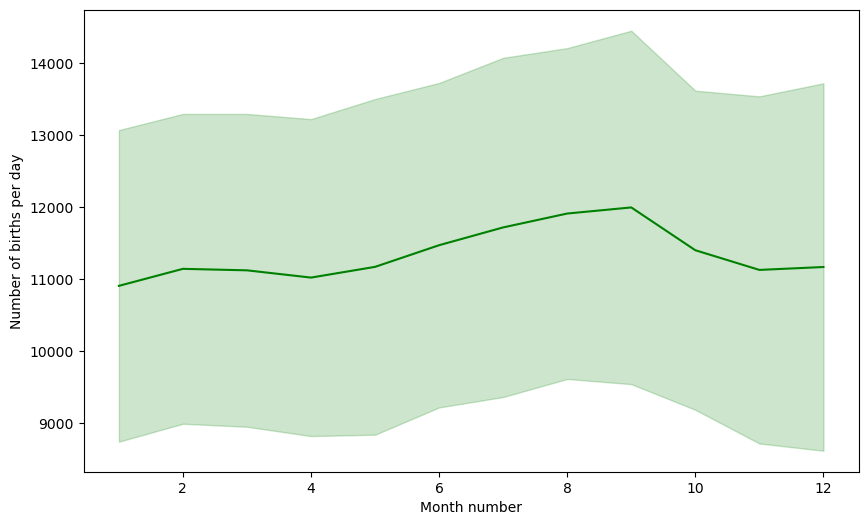

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
#sns.lineplot(x='month', y='births_ssa', data=data_ssa, ci='sd', color='green')
sns.lineplot(x='month', y='births_ssa', data=data_ssa, errorbar='sd', color='green')
plt.xlabel("Month number")
plt.ylabel("Number of births per day")
plt.show()


**2c. [5 marks] Extend the plot you made in 2b by improving the labeling, using `seaborn` and/or `matplotlib.pyplot` features:**
* Set the colour of the line to be green
* Set the x-axis ticks for months so that each month number is shown (1, 2, so on up to 12)
* Set the y-axis ticks to range from 0 at the bottom up to a number above the maximum of the plot.
* Set the x-axis label to "Month number" (using `xlabel()`)
* Set the y-axis label to "Number of births per day" (using `ylabel()`)

**This may require you to read relevant documentation - understanding how to read documentation is part of the assessment!**

# Improve labeling of the plot

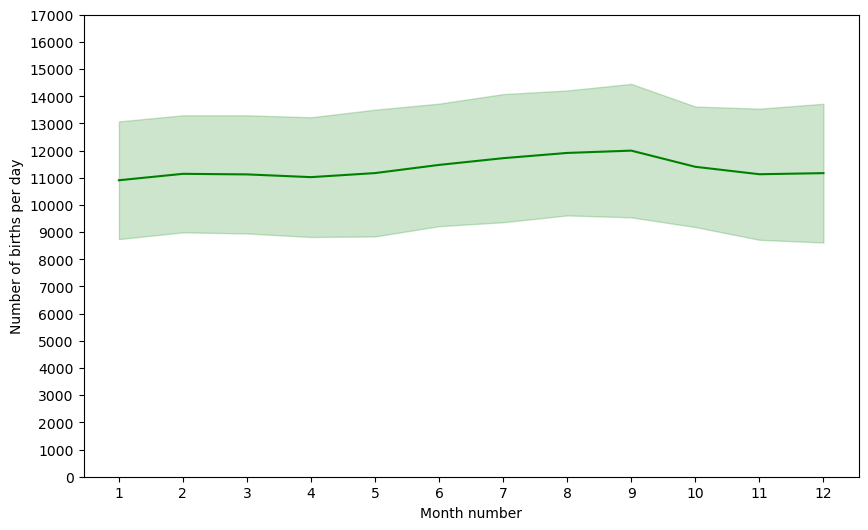

In [11]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='births_ssa', data=data_ssa, errorbar='sd', color='green')
plt.xlabel("Month number")
plt.ylabel("Number of births per day")
plt.xticks(range(1, 13))  # Set x-axis ticks for each month
plt.yticks(range(0, int(data_ssa['births_ssa'].max()) + 1000, 1000))  # Set y-axis ticks
plt.show()

**2d.  [5 marks] Compute the mean number of births per day for each year and month.**

# Compute the mean number of births per day for each year and month

In [12]:
mean_births_per_day = data_ssa.groupby(['year', 'month'])['births_ssa'].mean()
mean_births_per_day

year  month
2000  1        10894.806452
      2        11174.000000
      3        11220.129032
      4        10778.566667
      5        11224.193548
                   ...     
2014  8        11486.000000
      9        11683.233333
      10       11111.967742
      11       10621.833333
      12       10958.903226
Name: births_ssa, Length: 180, dtype: float64

**2e.  [5 marks] Using the data you computed in 2d, make a `seaborn` line plot with month as the horizontal axis, births per day as the vertical axis, and one line for each year.  (Because in 2d you have already reduced to one number of year/month combination, your `seaborn` plot will not have any error bars, so do not be concerned when they do not!)**

# Seaborn line plot with one line for each year

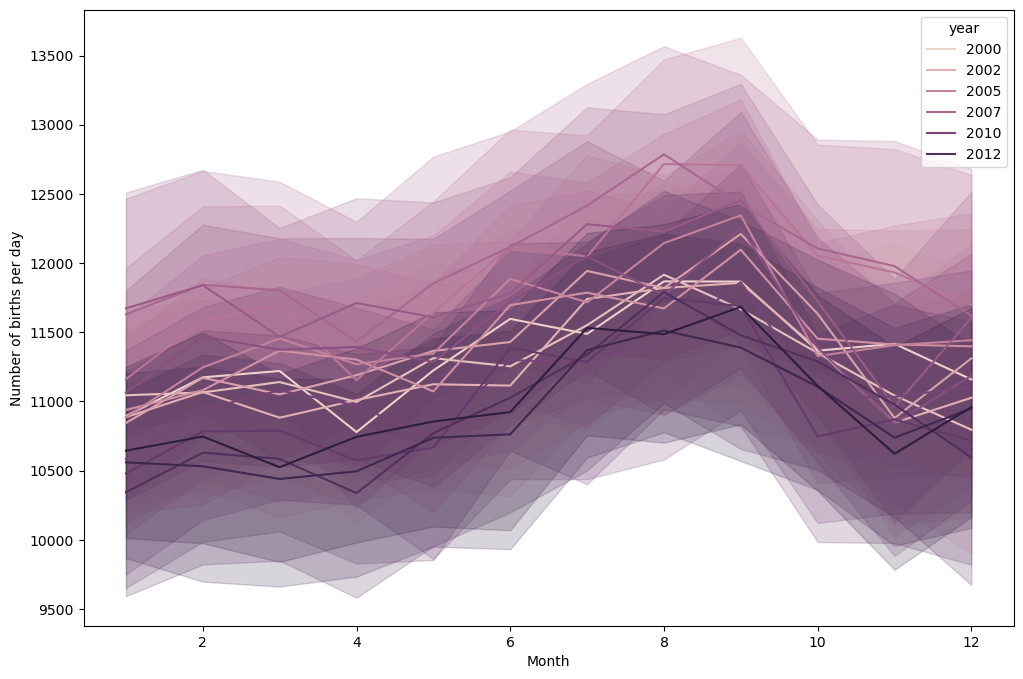

In [13]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='month', y='births_ssa', hue='year', data=data_ssa)
plt.xlabel("Month")
plt.ylabel("Number of births per day")
plt.show()

**2f.  [5 marks] Using the data you computed in 2d, produce a DataFrame in which each row corresponds to one year, each column corresponds to one month number, and the entries in the DataFrame are the average numbers of births per day in that year and month.  (Hint: Think shape!)**

# Create a DataFrame with average numbers of births per day for each year and month

In [14]:
average_births_df = mean_births_per_day.unstack()
average_births_df

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2000,10894.806452,11174.000000,11220.129032,10778.566667,11224.193548,11596.633333,11488.096774,11867.516129,11866.033333,11366.709677,11416.466667,11158.580645
2001,11044.483871,11064.964286,11140.161290,10996.133333,11312.548387,11253.533333,11550.935484,11915.580645,11666.266667,11350.064516,11042.533333,10795.580645
2002,10886.193548,11068.214286,10882.225806,11009.633333,11124.225806,11114.400000,11740.645161,11819.645161,11856.700000,11378.645161,10845.966667,11026.548387
2003,10843.967742,11171.035714,11050.774194,11189.700000,11365.000000,11429.466667,11943.096774,11820.032258,12210.700000,11633.354839,10879.600000,11311.096774
2004,10937.967742,11080.965517,11367.064516,11302.633333,11072.516129,11695.866667,11786.451613,11672.096774,12096.500000,11453.161290,11411.966667,11398.032258
2005,10886.387097,11246.071429,11455.516129,11268.666667,11346.322581,11885.866667,11716.000000,12144.096774,12345.133333,11327.774194,11406.066667,11442.580645
2006,11160.516129,11586.964286,11694.193548,11152.900000,11641.967742,12120.500000,12046.612903,12716.096774,12706.800000,12054.354839,11932.533333,11697.129032
2007,11629.709677,11843.464286,11802.838710,11432.700000,11854.548387,12116.200000,12414.870968,12785.645161,12425.800000,12105.548387,11977.833333,11619.451613
2008,11673.161290,11839.793103,11467.225806,11711.466667,11607.580645,11781.000000,12280.870968,12227.290323,12454.166667,11723.225806,10963.500000,11603.838710


## Question 3 [20 marks total]

**3a.  [5 marks] Summarise the distribution of the number of births by day of the week, giving (at least) the mean, standard deviation, and "five number summary" of the distribution.**

# Summarize the distribution of births by day of the week

In [15]:
births_by_day_summary = data_ssa.groupby('day_of_week')['births_ssa'].describe()
births_by_day_summary

,count,mean,std,min,25%,50%,75%,max
day_of_week,,,,,,,,
1,783.0,11897.830140,1169.361856,6409.0,11616.0,12087.0,12505.5,14053.0
2,783.0,13122.444444,906.409262,6325.0,12691.0,13198.0,13589.5,15645.0
3,783.0,12910.766284,890.521312,6620.0,12452.5,12932.0,13401.0,16081.0
4,782.0,12845.826087,1174.351965,6471.0,12462.0,12958.0,13437.5,15590.0
5,782.0,12596.162404,985.630498,6160.0,12180.0,12632.5,13166.5,15555.0
6,783.0,8562.573436,498.844065,6159.0,8255.5,8574.0,8862.0,10499.0
7,783.0,7518.376756,399.946834,5728.0,7259.5,7512.0,7777.5,8701.0


**3b. [5 marks] Extract the data corresponding only to Fridays.**

# Extract data corresponding only to Fridays

In [16]:
friday_data = data_ssa[data_ssa['day_of_week'] == 5]
friday_data

,year,month,date_of_month,day_of_week,births_ssa
6,2000,1,7,5,12516
13,2000,1,14,5,12180
20,2000,1,21,5,11953
27,2000,1,28,5,11934
34,2000,2,4,5,12035
...,...,...,...,...,...
5445,2014,11,28,5,9049
5452,2014,12,5,5,11964
5459,2014,12,12,5,12001
5466,2014,12,19,5,12714


**3c. [5 marks] Produce a DataFrame which compares the distribution of births on Fridays which are the 13th day of the month, versus other Fridays.**

# Produce a DataFrame comparing births on Friday the 13th vs. other Fridays

In [17]:
# Extract data for Friday the 13th
friday_13th_data = data_ssa[(data_ssa['day_of_week'] == 5) & (data_ssa['date_of_month'] == 13)]

# Extract data for other Fridays
other_fridays_data = data_ssa[(data_ssa['day_of_week'] == 5) & (data_ssa['date_of_month'] != 13)]

In [18]:
# Calculate the total number of births for each group
total_births_friday_13th = friday_13th_data['births_ssa'].sum()
total_births_other_fridays = other_fridays_data['births_ssa'].sum()

# Display the total number of births for each group
print("Total births on Friday the 13th:", total_births_friday_13th)
print("Total births on other Fridays:", total_births_other_fridays)

Total births on Friday the 13th: 298749
Total births on other Fridays: 9551450


In [19]:
# Calculate the distribution of births for each group
distribution_births_friday_13th = friday_13th_data['births_ssa'].describe()
distribution_births_other_fridays = other_fridays_data['births_ssa'].describe()

# Display the distribution of births for each group
print("distribution of births on Friday the 13th:", distribution_births_friday_13th)
print("distribution of births on other Fridays:", distribution_births_other_fridays)

distribution of births on Friday the 13th: count       25.000000
mean     11949.960000
std        580.212352
min      10881.000000
25%      11651.000000
50%      11994.000000
75%      12187.000000
max      13228.000000
Name: births_ssa, dtype: float64
distribution of births on other Fridays: count      757.000000
mean     12617.503303
std        989.262716
min       6160.000000
25%      12218.000000
50%      12656.000000
75%      13186.000000
max      15555.000000
Name: births_ssa, dtype: float64


**3d. [5 marks] Repeat the exercise in 3b and 3c to compare Thursday the 12th against other Thursdays.**

# Produce a DataFrame comparing births on Thursday the 12th vs. other Thursday

In [20]:
# Extract data for Thursday the 12th
thursday_12th_data = data_ssa[(data_ssa['day_of_week'] == 4) & (data_ssa['date_of_month'] == 12)]

# Extract data for other Thursdays
other_thursdays_data = data_ssa[(data_ssa['day_of_week'] == 4) & (data_ssa['date_of_month'] != 12)]

In [21]:
# Calculate the total number of births for each group
total_births_thursday_12th = thursday_12th_data['births_ssa'].sum()
total_births_other_thursdays = other_thursdays_data['births_ssa'].sum()

# Display the total number of births for each group
print("Total births on thursday the 12th:", total_births_thursday_12th)
print("Total births on other thursdayss:", total_births_other_thursdays)

Total births on thursday the 12th: 328321
Total births on other thursdayss: 9717115


In [22]:
# Calculate the distribution of births for each group
distribution_births_thursday_12th = thursday_12th_data['births_ssa'].describe()
distribution_births_other_thursdays = other_thursdays_data['births_ssa'].describe()

# Display the distribution of births for each group
print("distribution of births on thursday the 12th:", distribution_births_thursday_12th)
print("distribution of births on other thursdays:", distribution_births_other_thursdays)

distribution of births on thursday the 12th: count       25.000000
mean     13132.840000
std        584.181242
min      12050.000000
25%      12751.000000
50%      13134.000000
75%      13460.000000
max      14247.000000
Name: births_ssa, dtype: float64
distribution of births on other thursdays: count      757.000000
mean     12836.347424
std       1187.880387
min       6471.000000
25%      12454.000000
50%      12952.000000
75%      13432.000000
max      15590.000000
Name: births_ssa, dtype: float64


## Question 4 [25 marks total]

**4a. [2 marks] Read the CDC data into a DataFrame.  The file is available at**

https://raw.githubusercontent.com/tturocy/eco7026a/main/2022-23/US_births_CDC.csv

# Read the CDC data into a DataFrame

In [23]:
# URL for the CDC data
cdc_url = "https://raw.githubusercontent.com/tturocy/eco7026a/main/2022-23/US_births_CDC.csv"

# Read the CDC data into a DataFrame
data_cdc = pd.read_csv(cdc_url)

In [24]:
data_cdc.head()

,year,month,date_of_month,day_of_week,births_cdc
0,1994,1,1,6,8096
1,1994,1,2,7,7772
2,1994,1,3,1,10142
3,1994,1,4,2,11248
4,1994,1,5,3,11053


In [25]:
data_ssa.head()

,year,month,date_of_month,day_of_week,births_ssa
0,2000,1,1,6,9083
1,2000,1,2,7,8006
2,2000,1,3,1,11363
3,2000,1,4,2,13032
4,2000,1,5,3,12558


**4b. [7 marks] Combine the SSA and CDC datasets so there is one row per date that appears in *either* dataset.  Hint: Getting the "how" argument correct is important here!**

# Print the combined dataset

In [ ]:
import pandas as pd

df1 = pd.DataFrame({'customer_id': [1, 2, 3], 'name': ['Alice', 'Bob', 'Carol']})
df2 = pd.DataFrame({'customer_id_2': [1, 2, 4], 'age': [25, 30, 35]})

merged_df = df1.merge(df2, on='customer_id', how='left')

print(merged_df)


In [26]:
# Combine the SSA and CDC datasets using 'how' argument as 'outer'
#combined_data = pd.merge(data_ssa, data_cdc, how='outer', on=['year', 'month', 'day', 'day_of_week'])

combined_data = data_ssa.merge(data_cdc, on=['year', 'month', 'date_of_month', 'day_of_week'], how='left' )
# Print the combined dataset
combined_data


,year,month,date_of_month,day_of_week,births_ssa,births_cdc
0,2000,1,1,6,9083,8843.0
1,2000,1,2,7,8006,7816.0
2,2000,1,3,1,11363,11123.0
3,2000,1,4,2,13032,12703.0
4,2000,1,5,3,12558,12240.0
...,...,...,...,...,...,...
5474,2014,12,27,6,8656,NaN
5475,2014,12,28,7,7724,NaN
5476,2014,12,29,1,12811,NaN
5477,2014,12,30,2,13634,NaN


**4c. [6 marks] Add a new variable to the DataFrame you made in 4b, which gives the difference between the number of births in the SSA dataset and the number of births in the CDC dataset.**

In [30]:
# Add a new variable for the difference between SSA and CDC births
combined_data['birth_difference'] = combined_data['births_ssa'] - combined_data['births_cdc']
combined_data

,year,month,date_of_month,day_of_week,births_ssa,births_cdc,birth_difference
0,2000,1,1,6,9083,8843.0,240.0
1,2000,1,2,7,8006,7816.0,190.0
2,2000,1,3,1,11363,11123.0,240.0
3,2000,1,4,2,13032,12703.0,329.0
4,2000,1,5,3,12558,12240.0,318.0
...,...,...,...,...,...,...,...
5474,2014,12,27,6,8656,NaN,NaN
5475,2014,12,28,7,7724,NaN,NaN
5476,2014,12,29,1,12811,NaN,NaN
5477,2014,12,30,2,13634,NaN,NaN


**4d. [5 marks] Use `seaborn` to produce a histogram of the difference between SSA and CDC birth figures.**

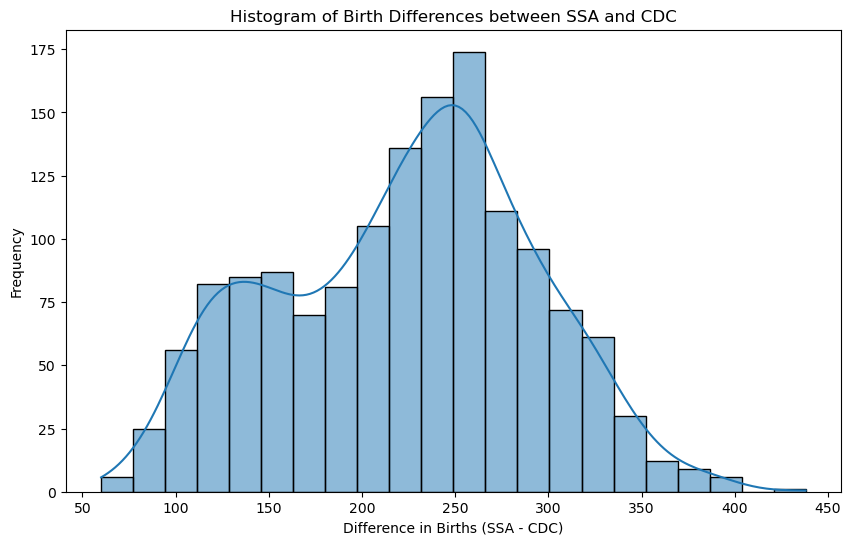

In [31]:
# Use seaborn to produce a histogram of the difference between SSA and CDC birth figures
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['birth_difference'], kde=True)
plt.xlabel("Difference in Births (SSA - CDC)")
plt.ylabel("Frequency")
plt.title("Histogram of Birth Differences between SSA and CDC")
plt.show()

**4e. [5 marks] Use `seaborn` to create a scatterplot, with the number of SSA births on the horizonal (x) axis, and CDC births on the vertical (y) axis.  Label the x-axis as "Births per day, SSA data" and the y-axis as "Births per day, CDC data".**

**Hint: We have not done a scatterplot before, so you may need to consult the seaborn documentation or examples to make one!  However, because seaborn's API is predictable, you can probably guess what you need to do even if you do not look at documentation.**

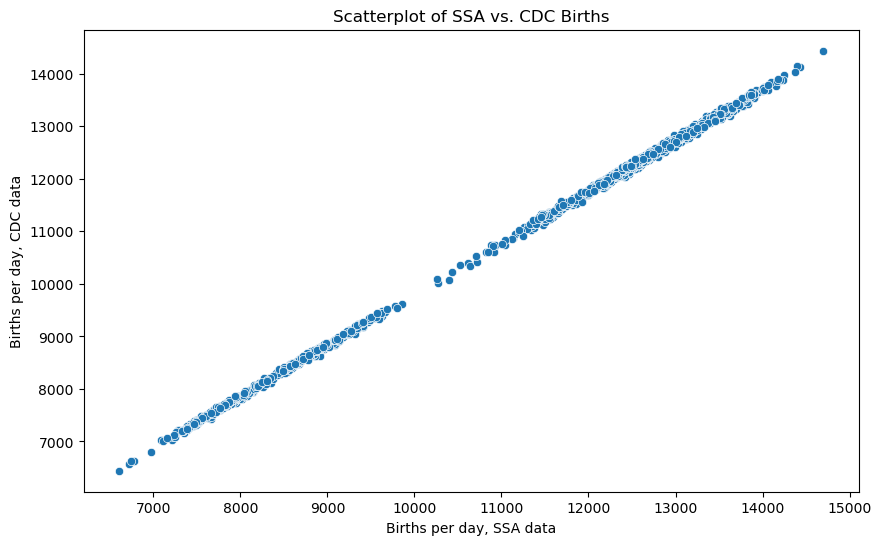

In [34]:
# Use seaborn to create a scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='births_ssa', y='births_cdc', data=combined_data)
plt.xlabel("Births per day, SSA data")
plt.ylabel("Births per day, CDC data")
plt.title("Scatterplot of SSA vs. CDC Births")
plt.show()